# Data 3406 Assignment 2
- Intro

## Loading Packages

In [54]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

## Loading Data

Below is where we plan to load all of our data so that we are able to use it for our analysis
- Author: Everyone
- Date: 9th November 2020


In [55]:
# Courses
c1courses = pd.read_excel("data/Cycle 1/C1 Courses.xlsx")
c2courses = pd.read_excel("data/Cycle 2/C2 Courses.xlsx")
c3courses = pd.read_excel("data/Cycle 3/C3 Courses.xlsx")
c4courses = pd.read_excel("data/Cycle 4/C4Courses.xlsx")

# Questions
c1questions = pd.read_excel("data/Cycle 1/C1 Questions.xlsx")
c2questions = pd.read_excel("data/Cycle 2/C2 Questions.xlsx")
c3questions = pd.read_excel("data/Cycle 3/C3 Questions.xlsx")
c4questions = pd.read_excel("data/Cycle 4/C4Questions.xlsx")
c4usercourses = pd.read_excel("data/Cycle 4/C4UsersCourses.xlsx")

#Answers
c3answers = pd.read_excel("data/Cycle 3/C3 Answers.xlsx")

#Comments
c1comments = pd.read_excel("data/Cycle 1/C1 Comments.xlsx")
c2comments = pd.read_excel("data/Cycle 2/C2 Comments.xlsx")
c4comments = pd.read_excel("data/Cycle 4/C4Comments.xlsx")

# UserCourses
c2usercourses = pd.read_excel("data/Cycle 2/C2 UsersCourses.xlsx")
c4usercourses = pd.read_excel("data/Cycle 4/C4UsersCourses.xlsx")

From this cell above, the data was successfully loaded and that we are able to now use it for our analysis
- Author: Everyone
- Date: 9th November 2020

## Cleaning Data
- We dealt with 0 and missing data values within our dataset 
- In terms of outliers, we chose to keep them as we would be able to use it later in the analysis
Explain how you dealt with 0 and missing data values.
- Explain how and why you transformed the data.

## Exploration of Dataset
- How we joined the datasets and different data sources we had access to eg different cycles
- The methods you used to understand the data (especially in the process notebooks).
- The measures of data distributions for numbers: stats that include minimum, maximum,
central tendency, spread measures, SD, IQR and visual presentation, histograms.
- The analysis for correlations, stats and visual presentation.
- Document the independence of each variable from others and your reasoning about this.
- Document your emerging understanding of the adequacy of the raw data and the degree to
which unknowns and unavailable data impact the validity and certainty of the results.
- Explore measures of fairness.
- Report how you identified outliers and explain how you dealt with them.

- Explain how you reasoned about the uncertainty and decisions made about reporting
results to account for that, both in statistics and visual presentation.

### Question/Comment Ratings Summary
- Put summaries of marks (academic mark and average rating and plots here)
- Histogram of distribution of average ratings
- **Thy is exploratory analysis**

## Uncertainty
- What contributes a good question

## Description of the different cycles
- Explanation of the data and how each cycle differed

## Lateness of Questions

---

- Author: Yan
- Date:
- Supporters:


### Cleaning Data
- For this section of the analysis, data cleaning was not required as we could simply just ignore any 0 or missing values


In [3]:
print("c1courses columns:", c1courses.columns.to_list())
print("c1questions columns:", c1questions.columns.to_list())

c1courses columns: ['CourseID', 'StartDate', 'Deadline_Cmmnt', 'Deadline_Qustn']
c1questions columns: ['id', 'course_id', 'timestamp', 'user', 'avg_rating', 'total_responses', 'total_ratings', 'top_rating_count', 'avg_difficulty', 'total_comments', 'deleted', 'answer', 'numAlts', 'question', 'altA', 'altB', 'altC', 'altD', 'altE', 'explanation']


#### Cycle 1

In [4]:
c1courses.rename(columns = {"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Cmmnt" : "comment_due", "Deadline_Qustn" : "question_due"}, inplace = True)
c1questions.rename(columns = {"id" : "question_id", "timestamp" : "question_time", "user" : "user_id"}, inplace = True)

- The cell below firstly converts the values to int64 and datetime64 data types so that we are able to join the 2 tables
- Furthermore, we use the `merge` function to join the c1courses and c1questions tables so that we are able to have the data available as 1 dataset

In [5]:
c1questions = c1questions.astype({"course_id" : "int64", "question_time" : 'datetime64'})
c1courses = c1courses.convert_dtypes()

c1combined = c1courses.merge(c1questions, on = "course_id")
c1combined.head()

,course_id,cycle_start,comment_due,question_due,question_id,question_time,user_id,avg_rating,total_responses,total_ratings,...,deleted,answer,numAlts,question,altA,altB,altC,altD,altE,explanation
0,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4342368,2020-03-04 17:52:14,217514,0.00,0,0,...,2,A,4,<p>[2a] In early 1950s high quality X-ray dif...,<p>Rosalind Franklin<br /><br /></p> ...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...
1,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4342370,2020-03-04 17:52:14,217514,0.50,7,4,...,0,A,4,<p>[Table X - Topic 2a] In early 1950s high q...,<p>Rosalind Franklin<br /><br /></p> ...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...
2,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349814,2020-03-09 15:55:46,636010,2.33,10,9,...,0,B,4,<p>Which of the following statements is true ...,<p>DNA polymerase can synthesize mRNA in the ...,<p>DNA polymerase can synthesize DNA in the 5...,<p>DNA polymerase can synthesize mRNA in the ...,<p>DNA polymerase can synthesize DNA in the 3...,...,<p>DNA polymerase is only able to synthesize ...
3,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349841,2020-03-09 16:16:45,636012,2.25,5,4,...,0,B,5,<p>The structure of DNA is closely related to...,<p>All base pairs interact by forming three h...,<p>DNA is comprised of nucleotide subunits ea...,<p>The double helix of DNA is stabilized by i...,<p>Each DNA sequence folds into a unique and ...,<p>DNA base pairs are held together by strong...,<p>DNA is made up of nucleotide subunits boun...
4,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349844,2020-03-09 16:17:41,636018,2.67,5,3,...,0,C,4,"<p>In a DNA molecule, Chargaff's rule means t...",<p>The amount of Adenine and Thymine = The am...,<p>The amount of Cytosine and Guanine = The a...,<p>The amount of Adenine and Guanine = The am...,<p>All of the above</p> ...,...,<p>Chargaff's rule states that the number of ...


- We can conclude from above that the c1courses and c1questions tables have now been successfully joined together

- The code block below aims to calculate the question_delta, question_beforedue and late variables by creating 3 columns and adding them to our dataset so that we are able to use this further down in our analysis

In [6]:
c1combined["question_delta"] = (c1combined["question_time"] - c1combined["question_due"])
c1combined["question_beforedue"] = (c1combined["question_due"] - c1combined["question_time"])
c1combined["late"] = c1combined["question_beforedue"].dt.days < 0
c1combined["not_late"] = c1combined["question_beforedue"].dt.days >= 0


- From the code block above, we can conclude that the 3 variables have now been added and created in our dataset

#### Cycle 2
- We will now do the same as what we did above for cycle 1, except now for cycle 2


- The code block below uses the `rename` function so that the variable names are consistent and clear throughout our notebook
- Furthermore, we used the `drop` function to drop the "CourseName" from the dataset since it is not requried

In [7]:
c2courses.rename(columns = {"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"}, inplace = True)
c2courses.drop("CourseName", axis = 1, inplace = True)
c2questions.rename(columns = {"id" : "question_id", "timestamp" : "question_time", "user" : "user_id"}, inplace = True)

- From the code above, the columns have now been successfully renamed and are now consistent with the rest of the dataset
- Furthermore, the "CourseName" column has now been droppped

- The cell below firstly converts the values to int64 and datetime64 data types so that we are able to join the 2 tables
- Furthermore, we use the `merge` function to join the c1courses and c1questions tables so that we are able to have the data available as 1 dataset

In [8]:
c2questions = c2questions.astype({"course_id" : "int64", "question_time" : 'datetime64'})
c2courses = c2courses.convert_dtypes()

c2combined = c2courses.merge(c2questions, on = "course_id")
c2combined.head()

,course_id,cycle_start,comment_due,question_due,question_id,question_time,user_id,avg_rating,total_responses,total_ratings,...,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation
0,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4391826,2020-03-26 19:10:48,636022,3.5,5,2,...,0,B,<p>Which of the following pair includes a pha...,4,"<p>G1 phase, DNA replication</p> ...","<p>G2 phase, preparation for mitosis</p> ...","<p>S phase, cell division</p> ...","<p>M phase, cell growth</p> ...",...,<p>G1 phase is growth and preparation of the ...
1,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392006,2020-03-26 20:54:26,636011,3.5,8,6,...,2,D,<p>A telomere has a repetitive nucleotide seq...,5,"<p>4, 3, 1, 2, 5</p> ...","<p>1, 2, 3, 4, 5</p> ...","<p>2, 5, 4, 1, 3</p> ...","<p>4, 2, 1, 3, 5</p> ...","<p>2, 4, 1, 5, 3</p> ...",<p>The correct answer is D with steps numbere...
2,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392084,2020-03-26 21:46:58,635990,3.5,3,2,...,0,D,<p>Table 8:</p><p>Which of the following stat...,4,<p>G0 is an optional part of the cell cycle w...,<p>All Eukaryotic cells which divide via the ...,"<p>In G0 phase, a cell replicates its DNA to ...",<p>Some types of cells can enter G0 phase and...,...,<p>The answer is D: G0 phase occurs when cell...
3,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392568,2020-03-27 01:07:25,636008,0.0,0,0,...,2,B,<p>There are some cells with different settin...,5,<p>a</p> ...,<p>b</p> ...,<p>c</p> ...,<p>d</p> ...,<p>e</p> ...,<p>All normal cells including heart cells and...
4,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392616,2020-03-27 01:25:01,636014,3.0,1,1,...,2,B,<p>Mary is a healthy 17 years old teenager wh...,5,<p>Too much telomerase activity can cause chr...,<p>The supplement can result in permanent act...,<p>The supplement can result in permanent act...,<p>The activation of telomerase does not allo...,<p>The activation of telomerase lowers the ra...,<p>The progressive shortening of telomeres as...


- We can conclude from above that the c2courses and c2questions tables have now been successfully joined together

- The code block below aims to calculate the question_delta, question_beforedue and late variables by creating 3 columns and adding them to our dataset so that we are able to use this further down in our analysis

In [9]:
#c2combined["question_delta"] = (c2combined["question_time"] - c2combined["question_due"])
c2combined["question_beforedue"] = (c2combined["question_due"] - c2combined["question_time"])
c2combined["late"] = c2combined["question_beforedue"].dt.days < 0
c2combined["not_late"] = c2combined["question_beforedue"].dt.days >= 0

- From the code block above, we can conclude that the 3 variables have now been added and created in our dataset

### Combining of Datasets

- The code block below creates a new column in the dataset which will display the cycle which the row belongs to
- Moreover, the `concat` function is used to combine both c1 and c2 into 1 single dataset
- We also set some of the variables to be of "int64" data type so that they are consistent
- Finally, we used `sort_values` function to sort our data set by the "question_beforedue" variable

In [10]:
c1combined["cycle"] = 1
c2combined["cycle"] = 2

all_combined = pd.concat([c1combined, c2combined])
all_combined = all_combined.astype({"course_id" : "int64", "user_id" : "int64", "question_id" : "int64"})
all_combined.head()

,course_id,cycle_start,comment_due,question_due,question_id,question_time,user_id,avg_rating,total_responses,total_ratings,...,altB,altC,altD,altE,explanation,question_delta,question_beforedue,late,not_late,cycle
0,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4342368,2020-03-04 17:52:14,217514,0.00,0,0,...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...,-6 days +16:52:04,5 days 07:07:56,False,True,1
1,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4342370,2020-03-04 17:52:14,217514,0.50,7,4,...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...,-6 days +16:52:04,5 days 07:07:56,False,True,1
2,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349814,2020-03-09 15:55:46,636010,2.33,10,9,...,<p>DNA polymerase can synthesize DNA in the 5...,<p>DNA polymerase can synthesize mRNA in the ...,<p>DNA polymerase can synthesize DNA in the 3...,...,<p>DNA polymerase is only able to synthesize ...,-1 days +14:55:36,0 days 09:04:24,False,True,1
3,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349841,2020-03-09 16:16:45,636012,2.25,5,4,...,<p>DNA is comprised of nucleotide subunits ea...,<p>The double helix of DNA is stabilized by i...,<p>Each DNA sequence folds into a unique and ...,<p>DNA base pairs are held together by strong...,<p>DNA is made up of nucleotide subunits boun...,-1 days +15:16:35,0 days 08:43:25,False,True,1
4,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349844,2020-03-09 16:17:41,636018,2.67,5,3,...,<p>The amount of Cytosine and Guanine = The a...,<p>The amount of Adenine and Guanine = The am...,<p>All of the above</p> ...,...,<p>Chargaff's rule states that the number of ...,-1 days +15:17:31,0 days 08:42:29,False,True,1


- From the block of code above, it can be concluded that both cycles have now been successfully combined together into one data set
- The data types for some variables have also been converted successfully resulting in better consistency

### Data Investigation

- The block of code before prints out the min and max of when a question was made

In [11]:
print("Earliest question was made at:", all_combined["question_time"].min().strftime("%d/%m/%Y"))
print("Latest question was made at:", all_combined["question_time"].max().strftime("%d/%m/%Y"))

Earliest question was made at: 04/03/2020
Latest question was made at: 10/04/2020


- From the code above we can conclude that:
  - the earliest question was made at: "04-03-2020"
  - the last question was made at "10-04-2020"

- The code below aims to group all the results by the "question_delta" which is the number of days early/late a question was made and calculates a count of each
- Furthermore, we then plot a bar graph of our count of the number of days early/late using the `plot` function 

<AxesSubplot:title={'center':'Time before due date of question that a question was made in Cycle 1 and 2'}, xlabel='Days before question due date', ylabel='Number of Questions'>

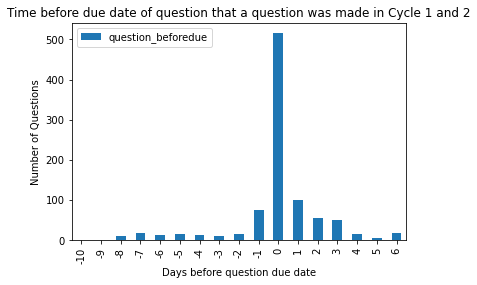

In [12]:
delta_grouped = all_combined[["question_beforedue"]].groupby(all_combined["question_beforedue"].dt.days).count()
delta_grouped.plot(kind = "bar", xlabel = "Days before question due date", ylabel = "Number of Questions", title = "Time before due date of question that a question was made in Cycle 1 and 2")

- From the code above, we can now see that our bar graph has been successfully ploted and that we are not able to conclude that the majority of questions were created 1 day before the due date

- The code below performs groups by user_id to determine if a student submitted a question late
- We will use this to determine the motivation level of each student to assist us in answering the driving question
- We then aim to plot a histogram using the `plot` function

In [13]:
ontime_students = all_combined[["user_id", "not_late"]].groupby("user_id", as_index=False).any("not_late")
ontime_students.head()

,user_id,not_late
0,217514,True
1,269035,True
2,504817,True
3,508271,True
4,555695,True


- As seen from the code above the number of students who submitted questions late have been now grouped into the number of days that their question was late

- The code block below aims to sorts the values based on the number of late questions submitted by each student through the use of the `sort_values` function

Connecting to cycle 4 groups

In [14]:
c4usercourses.rename(columns = {"user" : "user_id", "Team" : "team"}, inplace = True)
c4usercourses_ontime = c4usercourses.merge(ontime_students.reset_index(drop = True), on = "user_id")
c4usercourses_ontime.head()

#c4usercoures_late = c4usercoures.merge(ontime_students.reset_index(drop=True), on='user_id')

,user_id,course_id,team,not_late
0,636031,21320,Black,True
1,635993,21320,Black,True
2,636008,21320,Black,True
3,636010,21320,Black,True
4,635988,21320,Black,True


In [15]:
#c4usercourses_lateness.sort_values(by = "late", ascending = False)

In [16]:
ontime_by_group = c4usercourses_ontime[['team', 'not_late']].groupby("team").sum("not_late")
ontime_by_group['num_members'] = c4usercourses_ontime[['team', 'user_id']].groupby("team").count()
ontime_by_group['%on_time'] = ontime_by_group['not_late'] / ontime_by_group['num_members']
ontime_by_group = ontime_by_group.reset_index()

ontime_by_group.sort_values(by='%on_time', ascending=False)

,team,not_late,num_members,%on_time
0,Black,34,34,1.000000
2,Brown,36,36,1.000000
3,Green,38,39,0.974359
8,Yellow,30,31,0.967742
4,Pink,35,37,0.945946
5,Purple,14,15,0.933333
6,Red,34,37,0.918919
7,White,21,23,0.913043
1,Blue,31,34,0.911765


## Number of Correct Answers

---

- Author: Charlie
- Date:
- Supporters

Explore data
We will look at the questions data first, followed by the answers data
This will give us a good overview of what ranges our values lie in and any bias we need to consider
Keep in mind each student was required to answer 40 questions!
Questions data

In [17]:
c3questions.head()

,id,course_id,timestamp,user,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation
0,4421360,21230,2020-04-07 22:29:54,217514,2.50,29,20,1,0.7500,2,0,B,The telomeric repeat sequence in green algae ...,5,<p>5&prime; UUUUAGGGUUUU 3&prime;<br /><br />...,<p>5&prime; CCCUAAAACCCU 3&prime;<br /><br />...,<p>5&prime; CCCTAAAACCCT 3&prime;<br /><br />...,<p>5&prime; TTTTAGGGTTTT 3&prime;<br /><br />...,<p>5&prime; AGGGTTTTAGGG 3&prime;</p> ...,<p>no explanation</p> ...
1,4421361,21230,2020-04-07 22:30:18,217514,3.27,37,22,3,0.9091,1,0,D,Which of the following types of protein could...,4,<p>A protein which forms part of a growth fac...,<p>A protein which codes for a DNA repair enz...,<p>A protein which helps prevent apoptosis.</...,<p>A protein which controls progression throu...,...,<p>Tumour suppressor genes code for proteins ...
2,4421362,21230,2020-04-07 22:30:18,217514,2.96,32,24,1,0.5000,0,0,C,"In the cell cycle, the oncogenes are ________...",4,<p>the negative controls over growth;&nbsp;in...,<p>resulted from the activation of proto-onco...,<p>resulted from the activation of proto-onco...,<p>inactivated which causes cancer;&nbsp;the ...,...,"<p>In the cell cycle, there are two main type..."
3,4421363,21230,2020-04-07 22:30:19,217514,1.67,31,21,0,0.9524,3,0,C,"<img src=""../images/view.php?file=374795"" alt...",4,<p>G0</p> ...,<p>G2/M</p> ...,<p>G1</p> ...,<p>S</p> ...,...,<p>The answer is G1 cells as there is the lea...
4,4421364,21230,2020-04-07 22:30:19,217514,2.67,32,21,1,0.2857,0,0,D,"If there are 20 chromatids in a cell, how man...",5,<p>30</p> ...,<p>20</p> ...,<p>40</p> ...,<p>10</p> ...,<p>80</p> ...,<p>This is because each chromosome has exactl...


- We aren't interested in the number of alts or the alternate options (only the correct answer)
- We will use the correct answer to calculate the percentage correct for each of the users
What about the answers data?

<AxesSubplot:>

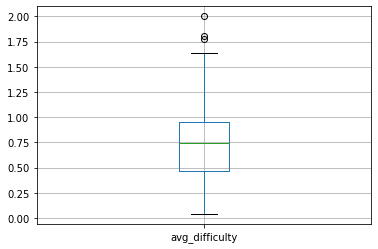

In [18]:
c3questions.boxplot('avg_difficulty')

<AxesSubplot:>

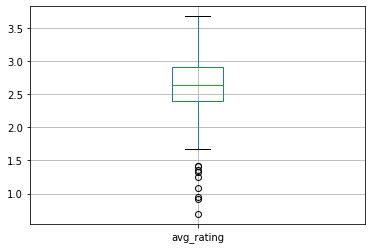

In [19]:
c3questions.boxplot('avg_rating')

- Most students rated question difficulty quite low
- Most questions had a reasonable rating so hopefully question quality does not affect our analysis too much (but keep in mind)
- Let's see how they do in answering these questions

In [20]:
c3answers.head()

,id,timestamp,user,question_id,answer,last_answer,result,cousreID
0,69566868,2020-04-08 00:24:47,636020,4421443,B,NaN,2,21230
1,69566931,2020-04-08 00:28:00,636020,4421442,D,NaN,2,21230
2,69567000,2020-04-08 00:32:09,636020,4421441,E,E,4,21230
3,69567037,2020-04-08 00:34:12,636020,4421440,B,B,4,21230
4,69567139,2020-04-08 00:40:17,636020,4421439,C,D,2,21230


- We will use the 'answer' column to determine if a student got a question correct

> Indented block



### Pre-processing and joins
- Firstly we'll construct dataframes using a subset of the columns (we don't need them all)
- We'll also rename some of these columns for clarity

In [21]:
qs_selected = c3questions[['id', 'timestamp', 'user', 'avg_rating', 'avg_difficulty', 'total_responses', 'total_comments', 'answer', 'course_id']] # Select certain columns
qs_selected = qs_selected.rename(columns={'id' : 'question_id', 'timestamp' : 'question_time', 'user' : 'user_id', 'answer' : 'correct_answer'})                   # Rename
qs_selected.head()

,question_id,question_time,user_id,avg_rating,avg_difficulty,total_responses,total_comments,correct_answer,course_id
0,4421360,2020-04-07 22:29:54,217514,2.50,0.7500,29,2,B,21230
1,4421361,2020-04-07 22:30:18,217514,3.27,0.9091,37,1,D,21230
2,4421362,2020-04-07 22:30:18,217514,2.96,0.5000,32,0,C,21230
3,4421363,2020-04-07 22:30:19,217514,1.67,0.9524,31,3,C,21230
4,4421364,2020-04-07 22:30:19,217514,2.67,0.2857,32,0,D,21230


In [22]:
ans_selected = c3answers[['id', 'timestamp', 'user', 'question_id', 'answer']]
ans_selected = ans_selected.rename(columns={'id' : 'answer_id', 'timestamp' : 'answer_time', 'user' : 'user_id', 'answer' : 'chosen_answer'})
ans_selected.head()

,answer_id,answer_time,user_id,question_id,chosen_answer
0,69566868,2020-04-08 00:24:47,636020,4421443,B
1,69566931,2020-04-08 00:28:00,636020,4421442,D
2,69567000,2020-04-08 00:32:09,636020,4421441,E
3,69567037,2020-04-08 00:34:12,636020,4421440,B
4,69567139,2020-04-08 00:40:17,636020,4421439,C


- We now have a much more organised questions dataframe, containing all the information we require for our analysis
- The column headings are also much clearer

### Analysis

#### Merging answers with questions
- Need to do this so we know what the correct answer is!
- `q_and_a` will be the answers but with the correct answer as well
- We may need more information about a particular question later but for now this is ok

In [23]:
q_and_a = ans_selected.merge(qs_selected[['question_id', 'correct_answer']], on='question_id')
q_and_a.head()

,answer_id,answer_time,user_id,question_id,chosen_answer,correct_answer
0,69566868,2020-04-08 00:24:47,636020,4421443,B,B
1,69567865,2020-04-08 01:09:42,636029,4421443,B,B
2,69570815,2020-04-08 03:03:02,635998,4421443,A,B
3,69583371,2020-04-08 10:34:31,635992,4421443,B,B
4,69595122,2020-04-08 14:55:46,636019,4421443,A,B


#### Finding the % of correct answers by each student
- We're going to calculate how many questions each student got correct
- Then using the total number of answers for each student, we will find the percentage of questions that each student got correct using the following formula $\frac{\text{num_correct}}{\text{total_answers}}$

<AxesSubplot:>

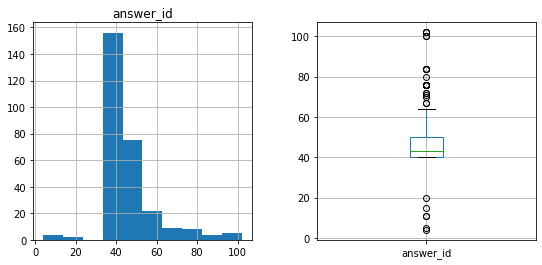

In [24]:
answers_by_student = q_and_a[['user_id', 'answer_id']].groupby('user_id', as_index=False).count() # Count number of answers per user

# Plot summary statistics for number of questions answered
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(9,4))
answers_by_student.hist('answer_id', ax=ax)
answers_by_student.boxplot('answer_id', ax=ax2)

**Interesting summaries:**
- Most students answered 40 questions (the required amount)
- Some students answered less than 20
- Some students answered 100 questions

- Now let's move on to the calculation of the number of correct answers
- We'll start by adding a new bool column to indicate whether a student was correct

<AxesSubplot:>

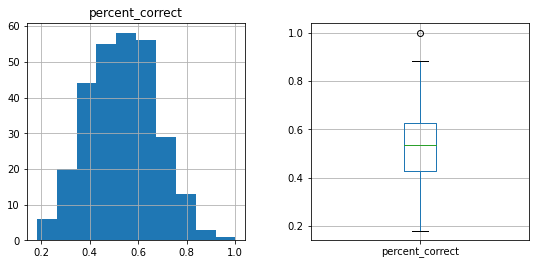

In [25]:
q_and_a['student_correct'] = q_and_a['chosen_answer'] == q_and_a['correct_answer']                    # Add new bool column to indicate whether an answer was correct
correct_by_student = q_and_a[['user_id', 'student_correct']].groupby('user_id', as_index=False).sum() # Create new dataframe and count number of correct answers, summing our new bool column

correct_by_student['total_answers'] = answers_by_student['answer_id']
correct_by_student['percent_correct'] = correct_by_student['student_correct'] / correct_by_student['total_answers']  # Calculate percentage of questions a student answered correctly

# Plot summary statistics for percentage of correct answers
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(9,4))
correct_by_student.hist('percent_correct', ax=ax)
correct_by_student.boxplot('percent_correct', ax=ax2)

- The percentage of correct answers follows a normal distrubution very closely
- Cool!

#### Team distrubution of correctness
- Now that we have the percentage of correct answers for each student, lets look at how this carries across to teams
- First, let's join the students to their respective Cycle 4 groups

In [26]:
c4usercourses = c4usercourses.rename(columns={'user' : 'user_id', 'Team' : 'team'})     # Rename columns so we can merge neatly
answers_team = correct_by_student.merge(c4usercourses, on='user_id')                  # Merge dataframes so we have team data for each student
answers_team.head()

,user_id,student_correct,total_answers,percent_correct,course_id,team
0,269035,22,40,0.550000,21327,Blue
1,555695,24,40,0.600000,21320,Red
2,555866,36,57,0.631579,21328,Green
3,556210,13,40,0.325000,21327,Brown
4,556601,22,40,0.550000,21328,Brown


- We now have team data for each of our students
- Next step is to group by team and average the percent_correct for each team member

<AxesSubplot:xlabel='team'>

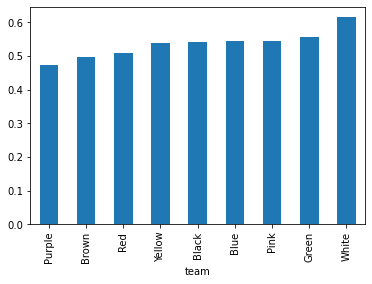

In [27]:
answers_groups_by_team = answers_team.groupby('team').mean()
answers_groups_by_team.sort_values(by='percent_correct')['percent_correct'].plot.bar()

- The white team got the highest average percentage correct and purple the lowest
- All teams are quite close together

<AxesSubplot:title={'center':'student_correct'}, xlabel='team'>

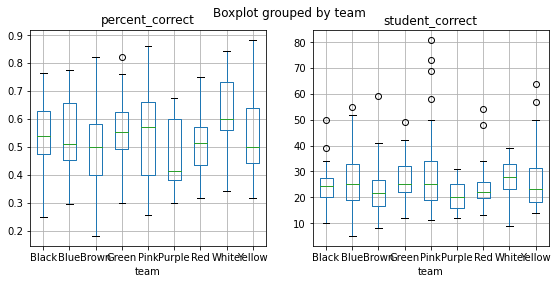

In [28]:
# Boxplots of percentage correct and number correct by team
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(9,4))
answers_team.boxplot('percent_correct', by='team', ax=ax)
answers_team.boxplot('student_correct', by='team', ax=ax2)

array([[<AxesSubplot:title={'center':'Black'}>,
        <AxesSubplot:title={'center':'Blue'}>,
        <AxesSubplot:title={'center':'Brown'}>],
       [<AxesSubplot:title={'center':'Green'}>,
        <AxesSubplot:title={'center':'Pink'}>,
        <AxesSubplot:title={'center':'Purple'}>],
       [<AxesSubplot:title={'center':'Red'}>,
        <AxesSubplot:title={'center':'White'}>,
        <AxesSubplot:title={'center':'Yellow'}>]], dtype=object)

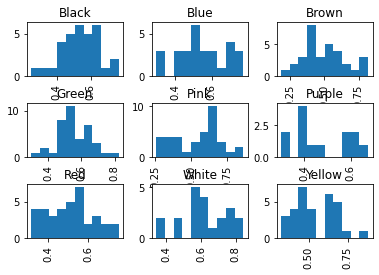

In [29]:
answers_team.hist('percent_correct', by='team')

- The teams are not too different from one another in distribution either,
- White team is definitely made up of the best performers on average though, with a min higher than all other groups, and a median higher than all other groups

#### Investigating time
- We'll now investigate the time it took each student to answer a question and will use that as an indicator of 'motivation'
- First, we need to get a deadline by joining with the Courses data from Cycle 3

In [30]:
c3courses_selected = c3courses[['CourseID', 'StartDate', 'DeadlineAnswer']]
c3courses_selected = c3courses_selected.rename(columns={'CourseID' : 'course_id', 'StartDate' : 'start_date', 'DeadlineAnswer' : 'answer_deadline'})
qs_with_deadline = qs_selected.merge(c3courses_selected, on='course_id')

qs_with_deadline.head()

,question_id,question_time,user_id,avg_rating,avg_difficulty,total_responses,total_comments,correct_answer,course_id,start_date,answer_deadline
0,4421360,2020-04-07 22:29:54,217514,2.50,0.7500,29,2,B,21230,2020-04-06,2020-04-21 01:00:10
1,4421361,2020-04-07 22:30:18,217514,3.27,0.9091,37,1,D,21230,2020-04-06,2020-04-21 01:00:10
2,4421362,2020-04-07 22:30:18,217514,2.96,0.5000,32,0,C,21230,2020-04-06,2020-04-21 01:00:10
3,4421363,2020-04-07 22:30:19,217514,1.67,0.9524,31,3,C,21230,2020-04-06,2020-04-21 01:00:10
4,4421364,2020-04-07 22:30:19,217514,2.67,0.2857,32,0,D,21230,2020-04-06,2020-04-21 01:00:10


#### Merging questions with deadline to answers
- We've joined to the answer deadline
- Now we need to join the questions with a deadline to their answers like we did previously

In [31]:
q_and_a_deadline = ans_selected.merge(qs_with_deadline[['question_id', 'correct_answer', 'start_date', 'answer_deadline']], on='question_id')
q_and_a_deadline = q_and_a_deadline.astype({'answer_time' : 'datetime64'})
q_and_a_deadline.head()

,answer_id,answer_time,user_id,question_id,chosen_answer,correct_answer,start_date,answer_deadline
0,69566868,2020-04-08 00:24:47,636020,4421443,B,B,2020-04-06,2020-04-21 01:00:10
1,69567865,2020-04-08 01:09:42,636029,4421443,B,B,2020-04-06,2020-04-21 01:00:10
2,69570815,2020-04-08 03:03:02,635998,4421443,A,B,2020-04-06,2020-04-21 01:00:10
3,69583371,2020-04-08 10:34:31,635992,4421443,B,B,2020-04-06,2020-04-21 01:00:10
4,69595122,2020-04-08 14:55:46,636019,4421443,A,B,2020-04-06,2020-04-21 01:00:10


- We now have a dataframe with an answer on each row, with the task start date, as well as the answer deadline and time
- Let's analyze the time data by:
    - Creating a new column for storing the time before the due date a question was answered
    - Creating a column to indicate if a question was answered late

<AxesSubplot:ylabel='Frequency'>

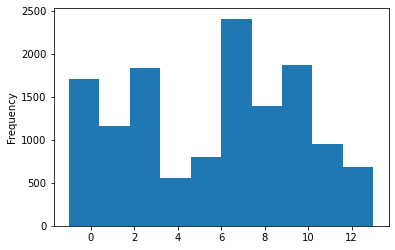

In [32]:
q_and_a_deadline['time_delta'] = q_and_a_deadline['answer_deadline'] - q_and_a_deadline['answer_time']  # 'Time difference between due date and answer time' column
q_and_a_deadline['late'] = q_and_a_deadline['time_delta'].dt.days < 0                                   # 'Answer was posted late' column

q_and_a_deadline['time_delta'].dt.days.plot.hist() # Plot days before due date

- The above histogram shows the number of days people answered before the deadline

## Lateness of Comments

---

- Author: Charlie
- Date: 
- Supporters: 

In [33]:
print("c1courses columns:", c1courses.columns.to_list())
print("c1comments columns:", c1comments.columns.to_list())

c1courses columns: ['course_id', 'cycle_start', 'comment_due', 'question_due']
c1comments columns: ['Comment_ID', 'course_id', 'Timestamp', 'user', 'Question_ID', 'Comment']


- From the above cell we can see that we need to rename some columns so we can join them nicely
- We will rename and merge the two dataframes in the below cell

In [34]:
c1courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Cmmnt" : "comment_due", "Deadline_Qustn" : "question_due"}, inplace=True) # Rename CourseID to course_id
c1comments.rename(columns={"Timestamp" : "comment_time", "CommentID" : "comment_id", "user" : "user_id", "Question_ID" : "question_id", "Comment" : "comment"}, inplace=True)

- There is an annoying header row located in the middle of the data that we need to remove
- We'll remove it now by making sure the "course_id" column is not equal to the text " course_id "

In [35]:
c1comments1 = c1comments[c1comments["course_id"] != " course_id "]
c1comments1

,Comment_ID,course_id,comment_time,user_id,question_id,comment
0,7039922,20995,2020-03-04 18:10:30,634147,4342370,Terrible question.
1,7045684,20995,2020-03-09 16:08:43,636012,4349814,I think the questions and answers were concise...
2,7045695,20995,2020-03-09 16:14:25,636010,4342370,This question concerns history rather than sci...
3,7045749,20995,2020-03-09 16:57:54,558135,4349855,I found this question particularly specific an...
4,7045750,20995,2020-03-09 16:58:39,636010,4349841,The question assesses your knowledge on a broa...
...,...,...,...,...,...,...
3365,7087388,21039,2020-03-22 12:18:19,640258,4356844,"Tricky, as students may get confused with DNA ..."
3366,7087405,21039,2020-03-22 12:23:26,640258,4356815,A really good question testing us on bonding.T...
3367,7087411,21039,2020-03-22 12:25:51,640258,4356773,"It's a simple question, but a good question be..."
3368,7087417,21039,2020-03-22 12:27:41,640258,4356734,This isn't a really good question is DNA is li...


- We will convert the data types of both the dataframes so they join properly too


In [36]:
#c1comments["course_id"] = pd.to_numeric(c1comments["course_id"])
c1comments1 = c1comments1.astype({"course_id" : "int64", "comment_time" : 'datetime64'})
c1courses1 = c1courses.convert_dtypes()

c1combined1 = c1courses1.merge(c1comments1, on="course_id") # Merge the dataframes
c1combined1.head() # Show the first 5 rows


,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment
0,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7039922,2020-03-04 18:10:30,634147,4342370,Terrible question.
1,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045684,2020-03-09 16:08:43,636012,4349814,I think the questions and answers were concise...
2,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045695,2020-03-09 16:14:25,636010,4342370,This question concerns history rather than sci...
3,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045749,2020-03-09 16:57:54,558135,4349855,I found this question particularly specific an...
4,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045750,2020-03-09 16:58:39,636010,4349841,The question assesses your knowledge on a broa...


- Now we have a dataframe that has the due date for the comment that was made for each of the comments

### Performing Analysis
- Next, we can calculate how long it took a student to write a comment after the question_due date
    - We're doing this to find out how long it took for a student to complete a comment after all the questions were due
    - We can use this metric to help us determine how motivated a student was
- We'll also calcualte a column to indicate how early before the comment_due date a student provided a comment on a question

### Creation of new columns
- We create the columns:
    - `comment_delta` (number of days after question due date that the comment was posted)
    - `comment_beforedue` (number of days before the comment due date that the comment was posted)
    - `late` (will be True if the comment was submitted after the comment_due date, False otherwise)

In [37]:
c1combined1["comment_delta"] = (c1combined1["comment_time"] - c1combined1["question_due"])
c1combined1["comment_beforedue"] = (c1combined1["comment_due"] - c1combined1["comment_time"])
c1combined1["late"] = c1combined1["comment_time"] > c1combined1["comment_due"]

### Doing the same grouping that we did for Cycle 1 - but for cycle 2
- I won't go over the details here just performing similar steps as we did for cycle 1

In [38]:
c2courses1 = c2courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"}) # Rename columns
#c2courses.drop("CourseName", axis=1, inplace=True) # Remove the 'CourseName' column - we don't need it
c2comments1 = c2comments.rename(columns={"Timestamp" : "comment_time", "CommentID" : "comment_id", "user" : "user_id", "Question_ID" : "question_id", "Comment" : "comment"})

In [39]:
# Set data types
c2comments1 = c2comments1.astype({"course_id" : "int64", "comment_time" : 'datetime64', "user_id" : "int64"}) 
c2courses1 = c2courses1.convert_dtypes() 

# Merge the dataframes
c2combined1 = c2courses1.merge(c2comments1, on="course_id") 
c2combined1.head()

,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment
0,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7110756,2020-03-27 23:02:16,636006,4394370,I think this is a good question. If you want t...
1,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7112982,2020-03-28 11:49:09,635990,4394722,I think the answer to this question might be p...
2,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7112999,2020-03-28 11:54:41,635990,4391826,I thought this question was a good test of kno...
3,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7113019,2020-03-28 12:02:39,635990,4395323,"I thought this question was really good, as it..."
4,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7113038,2020-03-28 12:10:55,635990,4396604,"I think this question was quite good, although..."


In [40]:
c2combined1["comment_delta"] = (c2combined1["comment_time"] - c2combined1["question_due"])
c2combined1["comment_beforedue"] = (c2combined1["comment_due"] - c2combined1["comment_time"])
c2combined1["late"] = c2combined1["comment_time"] > c2combined1["comment_due"]

### Combining the two cycles into one DataFrame
- Now we need to combine the two dataframes into one by using `.concat()`
- We'll add an ID to each individual dataframe so we know what cycle they belong to

In [41]:
c1combined1["cycle"] = 1
c2combined1["cycle"] = 2

all_combined1 = pd.concat([c1combined1, c2combined1])
all_combined1 = all_combined1.astype({"course_id" : "int64", "user_id" : "int64", "question_id" : "int64"})
all_combined1[all_combined1['late']].sort_values(by='comment_beforedue', ascending=False)

,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment,comment_delta,comment_beforedue,late,cycle
2043,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,7070065,2020-03-19 01:01:09,636844,4353868,The question is a little confusing because of ...,7 days 00:00:59,-1 days +23:59:01,True,1
539,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7062964,2020-03-17 01:01:57,636027,4350515,Basic question that demonstrates recall of inf...,7 days 00:01:47,-1 days +23:58:13,True,1
2733,21039,2020-03-12,2020-03-20 01:00:10,2020-03-13 01:00:10,7074889,2020-03-20 01:01:59,637312,4356537,All this question requires is to know the func...,7 days 00:01:49,-1 days +23:58:11,True,1
952,21142,2020-03-25,2020-04-07 01:00:10,2020-04-01 01:00:10,7136367,2020-04-07 01:02:34,636830,4415550,I think this was a pretty straightforward ques...,6 days 00:02:24,-1 days +23:57:36,True,2
540,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7062968,2020-03-17 01:02:45,636042,4350561,Great question. Especially for study. Makes yo...,7 days 00:02:35,-1 days +23:57:25,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,7083996,2020-03-21 18:51:24,636919,4353630,"This question is easy, students have to pay at...",9 days 17:51:14,-3 days +06:08:46,True,1
2062,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,7084039,2020-03-21 18:58:24,636919,4353750,This question requires us to recall the functi...,9 days 17:58:14,-3 days +06:01:46,True,1
2805,21039,2020-03-12,2020-03-20 01:00:10,2020-03-13 01:00:10,7092265,2020-03-23 00:58:12,637292,4355861,This is a clear simple question that tests rec...,9 days 23:58:02,-3 days +00:01:58,True,1
1026,21142,2020-03-25,2020-04-07 01:00:10,2020-04-01 01:00:10,7144697,2020-04-10 05:54:18,636252,4423617,Great application question requiring the under...,9 days 04:54:08,-4 days +19:05:52,True,2


### Investigating our data
- Lets first look at the comment time in general
- Followed by the number of unqiue students who commented past the due date

In [42]:
print("Earliest comment was made at:", all_combined1["comment_time"].min().strftime("%d/%m/%Y"))
print("Latest comment was made at:", all_combined1["comment_time"].max().strftime("%d/%m/%Y"))

Earliest comment was made at: 04/03/2020
Latest comment was made at: 10/04/2020


<AxesSubplot:title={'center':'Time after due date of question that a comment was posted in Cycle 1'}, xlabel='Days after question due date', ylabel='Number of comments'>

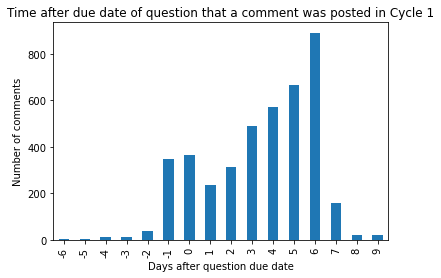

In [43]:
delta_grouped1 = all_combined1["comment_time"].groupby(all_combined1["comment_delta"].dt.days).count()

delta_grouped1.plot(kind="bar", xlabel="Days after question due date", ylabel="Number of comments", title="Time after due date of question that a comment was posted in Cycle 1")

In [44]:
student_lateness1 = all_combined1[["user_id", "late"]].groupby("user_id", as_index=False).sum("late")

- Plot the number of days a comment was late

<AxesSubplot:ylabel='Frequency'>

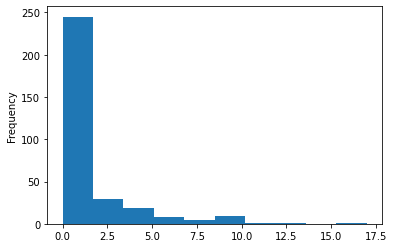

In [45]:
student_lateness1["late"].plot(kind="hist") 

- Below is a dataframe of the students who were late (sorted by number of late comments)

In [46]:
student_lateness1.sort_values("late", ascending=False)

,user_id,late
66,636027,17
56,636017,13
205,636844,11
316,640258,10
282,637293,10
...,...,...
139,636418,0
140,636419,0
141,636420,0
142,636421,0


### Connecting the students to their cycle 4 groups
- We need to link the students and their number of late comments do their groups in cycle 4
- This is so we can evaluate the impact of student 'lateness'/motivation on their marks and results

In [47]:
c4usercourses1 = c4usercourses.rename(columns={"user" : "user_id", "Team" : "team"}) # Rename columns
c4usercourses_lateness1 = c4usercourses1.merge(student_lateness1.reset_index(drop=True), on="user_id") # merge the columns


### Showing the number of late students
- Below is a dataframe of late students
- Below that is a graph showing the lateness of students by team

In [48]:
c4usercourses_lateness1.sort_values(by="late", ascending=False) # Sort the columns for output by lateness

,user_id,course_id,team,late
8,636027,21320,Black,17
43,636017,21320,Pink,13
188,636844,21327,Black,11
178,636919,21327,Yellow,10
253,637293,21328,Blue,10
...,...,...,...,...
45,635978,21320,Pink,0
44,636032,21320,Pink,0
152,636841,21327,Pink,0
153,636825,21327,White,0


<AxesSubplot:xlabel='team'>

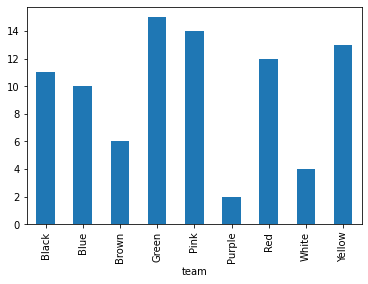

In [49]:
student_late_boolean1 = all_combined1[["user_id", "late"]].groupby("user_id", as_index=False).any("late")
team_latenes_boolean1 = c4usercourses1.merge(student_late_boolean1, on="user_id")
team_latenes_boolean1.groupby("team")["late"].sum().plot.bar()

### Proportion of team who were late
- Below is a graph showing the Proportion of the team members who were late
- This is calcualted by (number of late team members) / (number of total team members)
- Yellow has the highest % of lately submitted comments

<AxesSubplot:title={'center':'proportion of members in the team who made a late comment in cycles 1 and 2'}, xlabel='team', ylabel='proportion'>

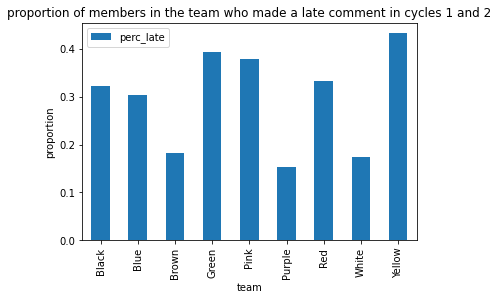

In [50]:
c4usercourses1[c4usercourses1['team'] == 'Pink']
team_latenes_boolean1[team_latenes_boolean1['team'] == 'Pink']

# Find number of members late and size of each team
members_late = team_latenes_boolean1[["team", "late"]].groupby("team").sum()
team_size = team_latenes_boolean1[["team", "user_id"]].groupby("team").nunique()

members_late["num_members"] = team_size
members_late["perc_late"] = members_late["late"] / members_late["num_members"] 
members_late = members_late.reset_index()
members_late[["team", "perc_late"]].plot.bar(x="team", title="proportion of members in the team who made a late comment in cycles 1 and 2", ylabel="proportion")

## Student Improvement in Cycle 4

---

In this section we will discuss the improvement seen for students from Cycles 2 and 3 compared to Cycle 4.

This is to assess the impact of the grouping on student performance using two different metrics:
- **Motivation** (how early questions/comments were posted)
- **Performance** (academic mark and average ratings for questions)

### Data preperation:
Firstly, we'll set-up our data for analysis towards the driving question by:
- Renaming the columns so they are neat for our analysis
- Dropping columns we won't use
- Adding a 'cycle' column indicating the cycle which the data belongs to so that when we merge the two cycles we can distinguish them from one another

In [56]:
### Cycle 2 data preperation ###

# Courses
c2courses_cl = c2courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"}) # Rename columns for neatness and easier merges later on
c2courses_cl = c2courses_cl.drop("CourseName", axis=1)  # Remove the CourseName column - we will never use it
c2courses_cl['cycle'] = 2                               # Column to indicate the cycle number

# Questions
c2questions_cl = c2questions.rename(columns={"id" : "question_id", "timestamp" : "question_time", "user" : "user_id"}) # Rename columns for neatness and easier merges later on
c2questions_cl = c2questions_cl.drop(['top_rating_count', 'numAlts', 'altA', 'altB', 'altC', 'altD', 'altE', 'question', 'explanation'], axis=1) # Remove these columns - we won't need them for our analysis
c2questions_cl['cycle'] = 2

### Cycle 4 data preperation ###

# Courses
c4courses_cl = c4courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"})
c4courses_cl = c4courses_cl.drop("CourseName", axis=1)
c4courses_cl['cycle'] = 4

# Questions
c4questions_cl = c4questions.rename(columns={"id" : "question_id", "timestamp" : "question_time", "user" : "user_id"})
c4questions_cl = c4questions_cl.drop(['top_rating_count', 'numAlts', 'altA', 'altB', 'altC', 'altD', 'altE', 'question', 'explanation'], axis=1) 
c4questions_cl['cycle'] = 4

# UserCourses
c4usercourses_cl = c4usercourses.rename(columns={'user' : 'user_id', 'Team' : 'team'}) 

We now have renamed and selected a subset of columns from the original data to make the upcoming analysis easier. There's also a new cycle column to indicate what cycle the data is from - this will be useful when merging the two dataframes.

*Note: The original data is still intact if we want to use these columns later for whatever reason!*

### Student question performance
This subsection will examine if the ratings and marks students received for their self-authored questions from cycle 2 have improved in cycle 4. Cycle 4 saw students put into groups so if there is a strong improvement it could be attributed to group involvement.



#### Grouping and aggregating:
We're going to group the data for both cycles by user_id, and aggregate the avg_rating for each user. We will use the mean to aggregate the avg_rating data. This will allow us to view the average rating each student received across all of their submitted questions in both Cycle 2 and Cycle 4.

In [58]:
# Rounding to 2dp for readability reasons
rating_by_user_2 = c2questions_cl[['user_id', 'avg_rating']].groupby('user_id').mean().round(2)         # Cycle 2 ratings
rating_by_user_4 = c4questions_cl[['user_id', 'avg_rating']].groupby('user_id').mean().round(2)         # Cycle 4 ratings

rating_by_user = rating_by_user_2.join(rating_by_user_4, how='inner', lsuffix="_c2", rsuffix='_c4')
rating_by_user.head()

,avg_rating_c2,avg_rating_c4
user_id,,
269035,0.75,3.14
555695,2.80,3.88
555866,1.34,2.57
556210,2.00,1.25
556601,4.50,2.75


Above is the result of grouping by user_id and aggregating on the avg_rating.  We performed an inner join because we wanted to ensure that there were no students in cycle 2, who did not participate in cycle 4.

#### Investigating the change in avg_rating across cycles:
The next step is to investigate the change in average_rating from cycle 2 to cycle 4 (by each student). 

We'll do this by creating columns to measure:
- The difference between cycle 4 ratings and cycle 2 ratings
- The % change between cycle 4 ratings and cycle 2 ratings

In [59]:
rating_by_user['change'] = rating_by_user['avg_rating_c4'] - rating_by_user['avg_rating_c2']                      # Difference between cycle 4 and cycle 2
rating_by_user['percent_change'] = (100 * (rating_by_user['change']) / rating_by_user['avg_rating_c2']).round(2)  # Percentage change between cycle 4 and cycle 2 - rounded to 2dp as calculated from columns with 2dp

# Calculate the total percent_change - we need to each avg_rating column to do this!
total_rating_c2 = rating_by_user['avg_rating_c2'].sum()
total_rating_c4 = rating_by_user['avg_rating_c4'].sum()
total_rating_change = total_rating_c4 - total_rating_c2
total_rating_percent_change = 100*total_rating_change / total_rating_c2

# Print out summary
display(rating_by_user.head())
print("The average change in rating across ALL users is {:.2f} points.".format(rating_by_user['change'].mean()))
print("The average percentage change in ratings across ALL users is {:.2f}%.".format(total_rating_percent_change))

,avg_rating_c2,avg_rating_c4,change,percent_change
user_id,,,,
269035,0.75,3.14,2.39,318.67
555695,2.80,3.88,1.08,38.57
555866,1.34,2.57,1.23,91.79
556210,2.00,1.25,-0.75,-37.50
556601,4.50,2.75,-1.75,-38.89


The average change in rating across ALL users is 0.75 points.
The average percentage change in ratings across ALL users is 32.46%.


<AxesSubplot:title={'center':'Cycle 4'}, ylabel='Frequency'>

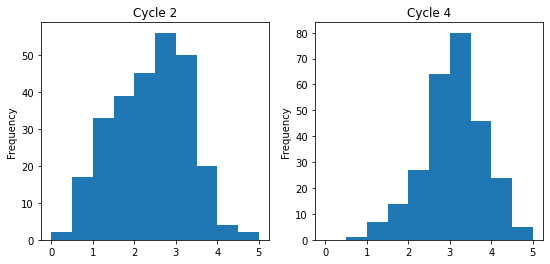

In [111]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(9,4))
rating_by_user['avg_rating_c2'].plot.hist(ax=ax, range=[0, 5], title='Cycle 2')
rating_by_user['avg_rating_c4'].plot.hist(ax=ax2, range=[0, 5], title='Cycle 4')

As output above from above:
- Across all users, the average ratings increased by 0.75
- Across all users, the average percentage change in ratings increased by 32.46%

From these results it appears that group participation DOES affect indivual performance (on average) but let's look a little bit deeper. 

**What if we check the improvement for those students with an average rating less than 1.5 in cycle 1? Did it increase in cycle 4 once they were in a team?**

The first step here is to filter our students based on their average mark. Then we'll compute the same average change in ratings as we did above, but for the students with weak cycle 2 scores.

In [107]:
low_performer_rating = rating_by_user[rating_by_user['avg_rating_c2'] <= 1.5] # Filter students with mark less than 1.5 in cycle 2

# Caluclate average percent_change for all students with cycle 2 marks <= 1.5 as we did for ALL students previously
low_performer_rating_c2 = low_performer_rating['avg_rating_c2'].sum()
low_performer_rating_c4 = low_performer_rating['avg_rating_c4'].sum()
low_performer_rating_change = low_performer_rating_c4 - low_performer_rating_c2
low_performer_rating_percent_change = 100*low_performer_rating_change / low_performer_rating_c2

display(low_performer_rating.head())
print("The average change in rating for users with a cycle 2 mark < 1.5 is {:.2f} points.".format(low_performer_rating['change'].mean()))
print("The average percentage change in ratings for users with a cycle 2 mark < 1.5 is {:.2f}%.".format(low_performer_rating_percent_change))

,avg_rating_c2,avg_rating_c4,change,percent_change
user_id,,,,
269035,0.75,3.14,2.39,318.67
555866,1.34,2.57,1.23,91.79
586755,1.16,3.97,2.81,242.24
635996,0.88,1.93,1.05,119.32
636008,1.43,3.32,1.89,132.17


The average change in rating for users with a cycle 2 mark < 1.5 is 1.97 points.
The average percentage change in ratings for users with a cycle 2 mark < 1.5 is 185.77%.


<AxesSubplot:title={'center':'Cycle 4 marks (cycle 2 low performers)'}, ylabel='Frequency'>

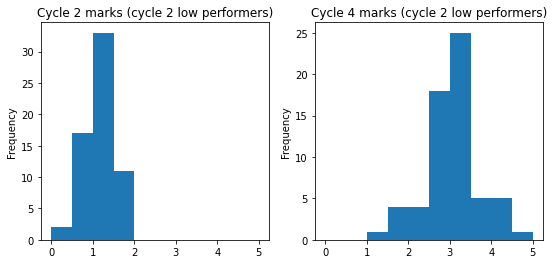

In [119]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(9,4))
low_performer_rating['avg_rating_c2'].plot.hist(ax=ax, range=[0, 5], title='Cycle 2 marks (cycle 2 low performers)')
low_performer_rating['avg_rating_c4'].plot.hist(ax=ax2, range=[0, 5], title='Cycle 4 marks (cycle 2 low performers)')

As output above above:
- Low performing users in cycle 2 had their average ratings increased by 1.97
- Low performing users in cycle 2 saw their cycle 4 ratings increase by 185.77%

This shows that the low performing students saw substantial increases in their avg_rating for their questions in cycle 4. It is likely that this is due to group participation, but there may be other confounding factors.

#### Student performance conclusions:
We can draw some main conclusions from our analysis of student performance.
- In cycle 2 when averaging all students, they performed better in cycle 4
- If we only consider students with an avg_rating less than 1.5, they saw much more significant changes than the average students
- It is possible that this is due to group involvement, although it is too difficult to say for certain due to multiple confounding factors (some which are not even represented in the data such as external factors affecting individual students)

In [120]:
mark_by_user_2 = c2questions_cl[['user_id', 'academic_mark']].groupby('user_id').mean().round(2)         # Cycle 2 ratings
mark_by_user_4 = c4questions_cl[['user_id', 'academic_mark']].groupby('user_id').mean().round(2)         # Cycle 4 ratings



KeyError: "['academic_mark'] not in index"

### Student Motivation
This subsection will examine if the question submission date and marks students received for their self-authored questions from cycle 2 have improved in cycle 4. As in the previous subsection, cycle 4 saw students put into groups so if there is a strong improvement it could be attributed to group involvement.



#### Merging data and calculating date column:
The first thing we need to do is to merge the questions data with the courses data so that we have access to the due date for student questions (this varies by the course the student is a part of). After merging the two dataframes together, we will create a new column that calculates the number of days from the start of the cycle that a question was posted. This should give an indication of how motivated a student is (smaller value is better).

In [60]:
# Merge data
c2courses_deadline = c2courses_cl.merge(c2questions_cl, on='course_id')
c4courses_deadline = c4courses_cl.merge(c4questions_cl, on='course_id')

# Create a subset dataframe with the columns we need and convert date to correct type
c2courses_delta = c2courses_deadline[['cycle_start', 'question_time', 'user_id']].astype({"question_time" : "datetime64", "cycle_start" : "datetime64"})
c4courses_delta = c4courses_deadline[['cycle_start', 'question_time', 'user_id']].astype({"question_time" : "datetime64", "cycle_start" : "datetime64"})

c2courses_delta['days_from_start'] = (c2courses_delta['question_time'] - c2courses_delta['cycle_start']).dt.days
c4courses_delta['days_from_start'] = (c4courses_delta['question_time'] - c4courses_delta['cycle_start']).dt.days

c2courses_delta.head()

,cycle_start,question_time,user_id,days_from_start
0,2020-03-23,2020-03-26 19:10:48,636022,3
1,2020-03-23,2020-03-26 20:54:26,636011,3
2,2020-03-23,2020-03-26 21:46:58,635990,3
3,2020-03-23,2020-03-27 01:07:25,636008,4
4,2020-03-23,2020-03-27 01:25:01,636014,4


Now we have the number of days between the start of the cycle and when the question was answered for each question that was asked. 

#### Grouping and aggregating
The next step is to aggregate the data so we know the average number of days each student submitted from the start of the cycle.

In [61]:
days_by_user_2 = c2courses_delta[['days_from_start', 'user_id']].groupby('user_id').mean().round(0)
days_by_user_4 = c4courses_delta[['days_from_start', 'user_id']].groupby('user_id').mean().round(0)

days_by_user = days_by_user_2.join(days_by_user_4, how='inner', lsuffix="_c2", rsuffix='_c4')
days_by_user.head()

,days_from_start_c2,days_from_start_c4
user_id,,
269035,6.0,4.0
555695,6.0,4.0
555866,5.0,7.0
556210,5.0,7.0
556601,6.0,5.0


With this new dataframe, we will calculate two new columns to measure the differences between cycle 2 and cycle 4.

Similarly to before, these two columns will be:
- The difference between cycle 4 delay and cycle 2 delay
- The % change between cycle 4 delay and cycle 2 delay

In [63]:
days_by_user['change'] = days_by_user['days_from_start_c4'] - days_by_user['days_from_start_c2']                      # Difference between cycle 4 and cycle 2
days_by_user['percent_change'] = (100 * days_by_user['change'] / days_by_user['days_from_start_c2']).round(2)  # Percentage change between cycle 4 and cycle 2 - rounded to 2dp as calculated from columns with 2dp

# Calculate the total percent_change - we need to each avg_rating column to do this!
total_days_c2 = days_by_user['days_from_start_c2'].sum()
total_days_c4 = days_by_user['days_from_start_c4'].sum()
total_days_change = total_days_c4 - total_days_c2
total_days_percent_change = 100*total_days_change / total_days_c2
 
# Print out summary
display(days_by_user.head())
print("The average change in delay across ALL users is {:.2f} days.".format(days_by_user['change'].mean()))
print("The average percentage change in delays across ALL users is {:.2f}%.".format(total_days_percent_change))

,days_from_start_c2,days_from_start_c4,change,percent_change
user_id,,,,
269035,6.0,4.0,-2.0,-33.33
555695,6.0,4.0,-2.0,-33.33
555866,5.0,7.0,2.0,40.00
556210,5.0,7.0,2.0,40.00
556601,6.0,5.0,-1.0,-16.67


The average change in delay across ALL users is -0.32 days.
The average percentage change in delays across ALL users is -5.45%.


<AxesSubplot:title={'center':'Cycle 4'}, ylabel='Frequency'>

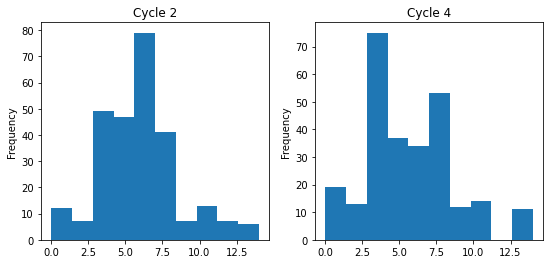

In [89]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(9,4))
days_by_user['days_from_start_c2'].plot.hist(ax=ax, title='Cycle 2')
days_by_user['days_from_start_c4'].plot.hist(ax=ax2, title='Cycle 4')